In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Minimax rational fit to the exponential

In [2]:
a0 = cp.Variable()
a1 = cp.Variable()
a2 = cp.Variable()
b1 = cp.Variable()
b2 = cp.Variable()

alpha = cp.Parameter()

k = 201
constraints = []

t_arr = []
y_arr = []

for i in np.arange(1, k+1):
  t = -3 + (6*(i - 1) / (k - 1))
  y = np.exp(t)

  t_arr.append(t)
  y_arr.append(y)

  lhs = a0 + a1 * t + a2 * t**2 - y - y * b1 * t -  y * b2 * t**2
  rhs = alpha * (1 + b1 * t + b2 * t**2)

  constraints += [lhs <= rhs]
  constraints += [-lhs <= rhs]

l = 0
r = np.exp(3)
tol = 1e-4

while(abs(l - r) > tol):
  m = 0.5*(l + r)
  alpha.value = m

  problem = cp.Problem(cp.Minimize(0) , constraints) #Feasibility
  problem.solve()
  if problem.status == 'infeasible':
    l = m
  else:
    r = m

a0, a1, a2, b1, b2 = a0.value, a1.value, a2.value, b1.value, b2.value

print(f'a0:{a0}\na1:{a1}\na2:{a2}')
print(f'b1:{b1}\nb2:{b2}')

a0:1.009852197473112
a1:0.6121708704569968
a2:0.11344971139605486
b1:-0.4145203008615985
b2:0.04848029425960619


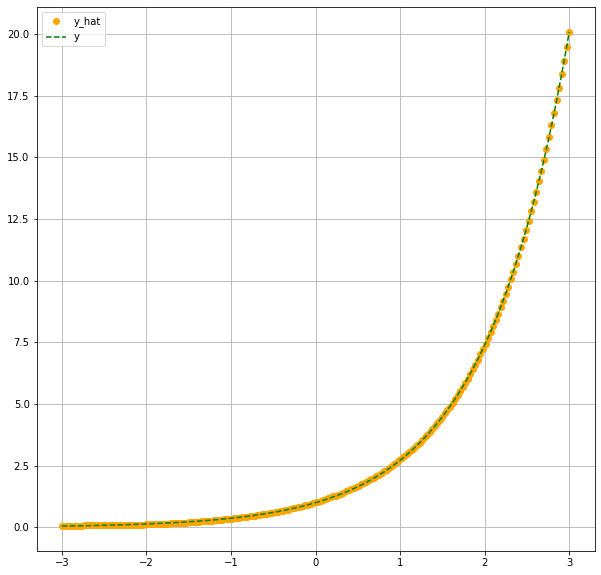

In [3]:
y = np.array(y_arr).reshape(-1, 1)
t = np.array(t_arr).reshape(-1, 1)
T = np.hstack([np.ones(t.shape[0]).reshape(-1, 1), t, t**2])

num = a0 + a1 * t + a2 * t**2
denom = 1 + b1 * t + b2 * t**2
y_hat = num / denom

plt.figure(figsize = (10, 10))
plt.plot(t, y_hat, 'o', label='y_hat', color='orange')
plt.plot(t, y, '--', label='y', color='green')
plt.legend()
plt.grid()

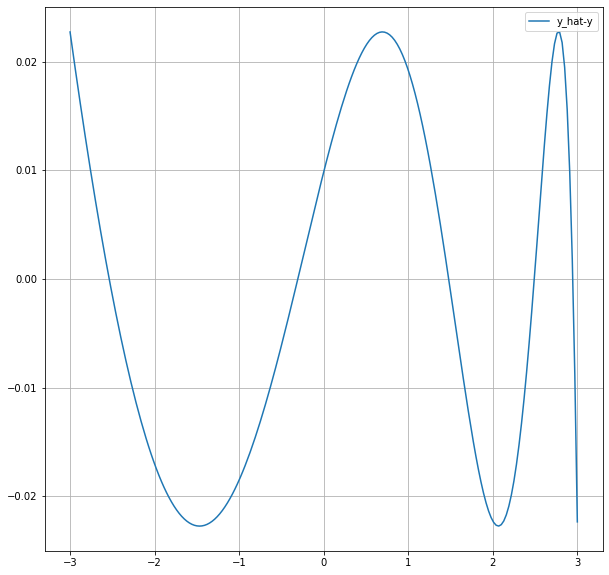

In [13]:
plt.figure(figsize = (10, 10))
plt.plot(t, (y_hat - y)[:, 0], label='y_hat-y')
plt.legend()
plt.grid()